# Mental Health Treatment

## Project Notebook
-   Swastik Majumdar 1005802
-   Aditya Vishwanath  1004281
-   Harikrishnan Chalapathy Anirudh 1005501

### Table of Contents

-   Packages required
-   Data preprocessing
-   Data Visualization
-   Train Test Validation Split
-   Model Architecture
-   Accuracy and Loss curves
-   Evaluation
-   Loading the trained model
-   Comparison of model performance against some state-of-the-art ones

#### Packages required

In [262]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from torchmetrics.classification import BinaryAccuracy
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import tensorflow as tf
import autokeras as ak

#### Data preprocessing

**Load the datatset**

In [263]:
df = pd.read_csv("Mental Health Data.csv")
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,1 to 5,1.0,NaN,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Sometimes,Often,33,Male,Canada,NaN,Canada,NaN,Back-end Developer,Sometimes
1,0,1 to 5,1.0,NaN,No,No,No,I don't know,Very easy,Yes,...,Not applicable to me,Not applicable to me,40,male,Netherlands,NaN,Netherlands,NaN,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1.0,NaN,Yes,Yes,No,I don't know,I don't know,Maybe,...,Not applicable to me,Not applicable to me,21,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer|DevOps/SysAdmin,Never
3,0,1 to 5,1.0,NaN,No,No,No,No,Very difficult,No,...,Often,Often,36,Male,Brazil,NaN,Brazil,NaN,Back-end Developer,Never
4,0,1 to 5,0.0,1.0,I don't know,No,Yes,No,Very difficult,Yes,...,Not applicable to me,Often,36,F,United States of America,Indiana,United States of America,Indiana,Other,Sometimes


In [264]:
a = list(df.columns)
b = [
    "self_employed",
    "no_of_employees",
    "tech_company",
    "role_IT",
    "mental_healthcare_coverage",
    "knowledge_about_mental_healthcare_options_workplace",
    "employer_discussed_mental_health ",
    "employer_offer_resources_to_learn_about_mental_health",
    "medical_leave_from_work ",
    "comfortable_discussing_with_coworkers",
    "employer_take_mental_health_seriously",
    "knowledge_of_local_online_resources ",
    "productivity_affected_by_mental_health ",
    "percentage_work_time_affected_mental_health",
    "openess_of_family_friends",
    "family_history_mental_illness",
    "mental_health_disorder_past",
    "currently_mental_health_disorder",
    "diagnosed_mental_health_condition",
    "type_of_disorder",
    "treatment_from_professional",
    "while_effective_treatment_mental_health_issue_interferes_work",
    "while_not_effective_treatment_interferes_work ",
    "age",
    "gender",
    "country",
    "US state",
    "country work ",
    "US state work",
    "role_in_company",
    "work_remotely",
]

In [265]:
for i, j in zip(a, b):
    df.rename(columns={i: j}, inplace=True)

**Remove unnecessary columns**

In [266]:
cols = [
    "role_IT",
    "knowledge_of_local_online_resources ",
    "productivity_affected_by_mental_health ",
    "percentage_work_time_affected_mental_health",
    "type_of_disorder",
    "US state",
    "US state work",
]

In [267]:
df = df.drop(cols, axis=1)

**Clean no_of_employees column**

In [268]:
df["no_of_employees"].unique()

array(['1 to 5', '6 to 25', '26-99', '100-500', '26-100', '500-1000',
       'More than 1000', nan], dtype=object)

In [269]:
df["no_of_employees"].replace(
    to_replace=["1 to 5", "6 to 25", "More than 1000", "26-99"],
    value=["1-5", "6-25", ">1000", "26-100"],
    inplace=True,
)
df.no_of_employees.unique()

array(['1-5', '6-25', '26-100', '100-500', '500-1000', '>1000', nan],
      dtype=object)

**Clean mental_healthcare_coverage column**

In [270]:
df["mental_healthcare_coverage"].unique()

array(['Yes', 'No', "I don't know", 'Not eligible for coverage / N/A',
       nan], dtype=object)

In [271]:
df["mental_healthcare_coverage"].replace(
    to_replace=["Not eligible for coverage / N/A"], value="No", inplace=True
)
df["mental_healthcare_coverage"].unique()

array(['Yes', 'No', "I don't know", nan], dtype=object)

**Clean openess_of_family_friends column**

In [272]:
df["openess_of_family_friends"].unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       'Not applicable to me (I do not have a mental illness)',
       'Not open at all'], dtype=object)

In [273]:
df["openess_of_family_friends"].replace(
    to_replace=["Not applicable to me (I do not have a mental illness)"],
    value="I don't know",
    inplace=True,
)
df["openess_of_family_friends"].unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       "I don't know", 'Not open at all'], dtype=object)

**Clean age column**

In [274]:
df["age"].value_counts()

age
30     94
31     82
29     79
28     74
35     74
32     72
33     69
34     69
26     64
27     63
37     59
39     55
38     54
36     50
25     44
24     42
40     36
22     32
44     31
43     30
42     29
45     27
23     24
41     24
46     22
21     15
47     14
49     13
55     12
48      9
50      9
54      7
52      7
51      7
20      6
56      5
63      4
57      4
19      4
53      3
61      2
59      2
66      1
17      1
323     1
74      1
58      1
70      1
62      1
3       1
99      1
15      1
65      1
Name: count, dtype: int64

In [275]:
# Replace the values in the age column that are outside 
# the range 18 to 75 with the median age
med_age = df[(df["age"] >= 18) | (df["age"] <= 75)]["age"].median()
df["age"].replace(
    to_replace=df[(df["age"] < 18) | (df["age"] > 75)]["age"].tolist(),
    value=med_age,
    inplace=True,
)

# Define the scaler object
scaler = MinMaxScaler()

# Fit and transform the 'age' column
df["age"] = scaler.fit_transform(df[["age"]])

**Clean gender column**

In [276]:
df["gender"].unique()

array(['Male', 'male', 'F', 'Transitioned, M2F', 'Other/Transfeminine',
       'M', 'female', 'm', 'Female', 'f', 'non-binary', 'woman', 'male ',
       'Male ', 'Bigender', 'Genderfluid (born female)',
       'male 9:1 female, roughly', 'Male (cis)', 'Other', 'Sex is male',
       'genderqueer', 'Human', 'mail', 'Cis-woman',
       'female-bodied; no feelings about gender', 'Transgender woman',
       'Genderfluid', 'female ', 'Male/genderqueer', 'fem', 'Nonbinary',
       ' Female', 'Female ', 'Genderqueer', nan, 'I identify as female.',
       'fm', 'Cis female ', 'female/woman', 'Androgynous', 'man',
       'nb masculine', 'Cisgender Female', 'Woman', 'Cis Male',
       'Female or Multi-Gender Femme', 'Male.', 'Enby', 'Agender',
       'Female (props for making this a freeform field, though)',
       'cis man', 'Female assigned at birth ', 'Cis male', 'Man',
       'none of your business', 'cis male', 'genderqueer woman', 'Queer',
       'Dude', 'Male (trans, FtM)', 'cisdude', 'Gen

In [277]:
df["gender"].replace(
    to_replace=[
        "Male",
        "male",
        "Male ",
        "M",
        "m",
        "man",
        "Cis male",
        "Male.",
        "male 9:1 female, roughly",
        "Male (cis)",
        "Man",
        "Sex is male",
        "cis male",
        "Malr",
        "Dude",
        "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
        "mail",
        "M|",
        "Male/genderqueer",
        "male ",
        "Cis Male",
        "Male (trans, FtM)",
        "cisdude",
        "cis man",
        "MALE",
    ],
    value="male",
    inplace=True,
)
df["gender"].replace(
    to_replace=[
        "Female",
        "female",
        "I identify as female.",
        "female ",
        "Female assigned at birth ",
        "F",
        "Woman",
        "fm",
        "f",
        "Cis female ",
        "Transitioned, M2F",
        "Genderfluid (born female)",
        "Female or Multi-Gender Femme",
        "Female ",
        "woman",
        "female/woman",
        "Cisgender Female",
        "fem",
        "Female (props for making this a freeform field, though)",
        " Female",
        "Cis-woman",
        "female-bodied; no feelings about gender",
        "AFAB",
    ],
    value="female",
    inplace=True,
)
df["gender"].replace(
    to_replace=[
        "Bigender",
        "non-binary",
        "Other/Transfeminine",
        "Androgynous",
        "Other",
        "nb masculine",
        "none of your business",
        "genderqueer",
        "Human",
        "Genderfluid",
        "Enby",
        "genderqueer woman",
        "mtf",
        "Queer",
        "Agender",
        "Fluid",
        "Nonbinary",
        "human",
        "Unicorn",
        "Genderqueer",
        "Genderflux demi-girl",
        "Transgender woman",
    ],
    value="other",
    inplace=True,
)
df["gender"].unique()

array(['male', 'female', 'other', nan], dtype=object)

In [278]:
tech_list = []
tech_list.append(
    df[df["role_in_company"].str.contains("Back-end")]["role_in_company"].tolist()
)
tech_list.append(
    df[df["role_in_company"].str.contains("Front-end")]["role_in_company"].tolist()
)
tech_list.append(
    df[df["role_in_company"].str.contains("Dev")]["role_in_company"].tolist()
)
tech_list.append(
    df[df["role_in_company"].str.contains("DevOps")]["role_in_company"].tolist()
)
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

df["tech_role"] = df["role_in_company"]
df["tech_role"].replace(to_replace=flat_list, value=1, inplace=True)
remain_list = df["tech_role"].unique()[1:]
df["tech_role"].replace(to_replace=remain_list, value=0, inplace=True)


df = df.drop(["role_in_company"], axis=1)

In [279]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df), columns=df.columns)
df["age"] = df["age"].astype(float)

#### Data visualization

**Effects of self employment:**

Self employed people are slightly more prone to mental health issues.

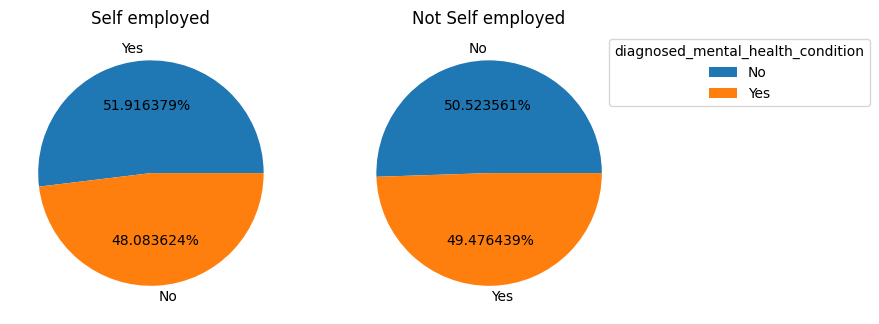

In [280]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.title("Self employed")
plt.pie(df[df.self_employed == 1]['diagnosed_mental_health_condition'].value_counts(),
    autopct = '%1f%%', radius = 1,
    labels = df[df.self_employed == 1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1, 2, 2)
plt.title("Not Self employed")
plt.pie(df[df.self_employed == 0]['diagnosed_mental_health_condition'].value_counts(),
    autopct = '%1f%%', radius = 1,
    labels = df[df.self_employed == 0]['diagnosed_mental_health_condition'].value_counts().index)
# center the legend to the top right of the plot
plt.legend(title="diagnosed_mental_health_condition", bbox_to_anchor=(0.90, 1.0))

plt.savefig('outputs/self_employed.png', bbox_inches = 'tight')

**Effect of company size on mental health:**

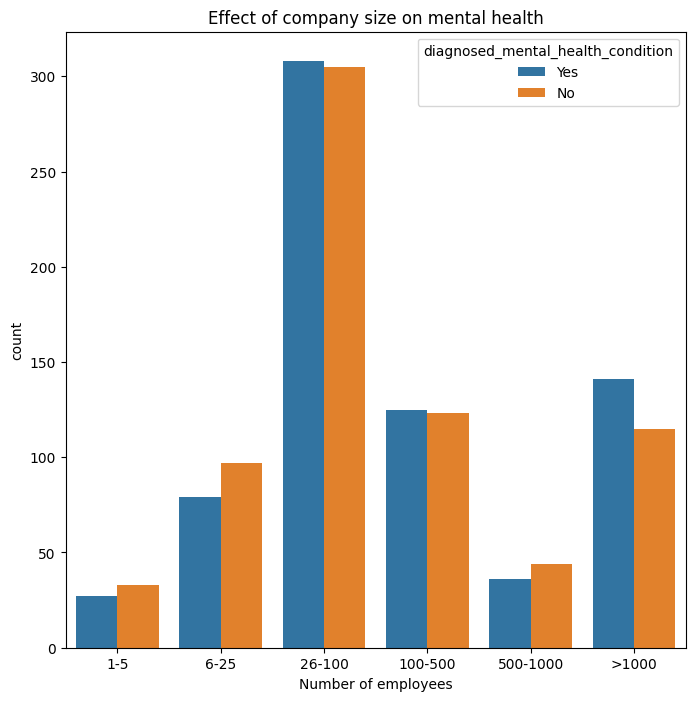

In [281]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='no_of_employees', hue='diagnosed_mental_health_condition')
plt.xlabel("Number of employees")
plt.title('Effect of company size on mental health')
plt.savefig('outputs/company_size.png')

**Impact of Company-Provided Resources on Employee Mental Health**

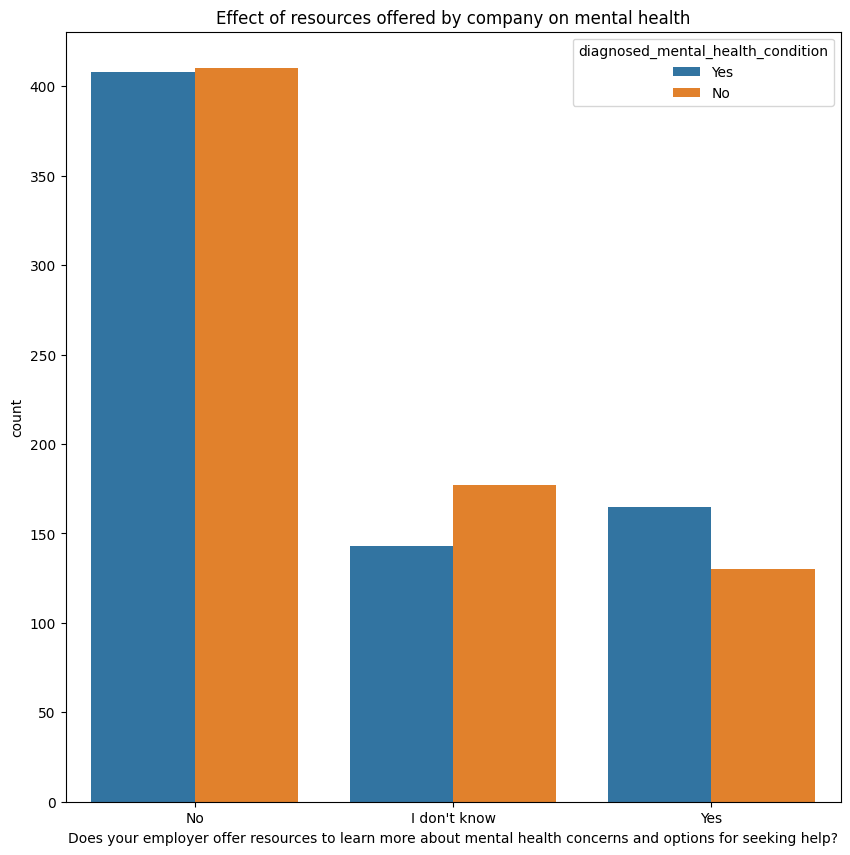

In [282]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='employer_offer_resources_to_learn_about_mental_health',hue='diagnosed_mental_health_condition')
plt.xlabel("Does your employer offer resources to learn more about mental health concerns and options for seeking help?")
plt.title('Effect of resources offered by company on mental health')
plt.savefig('outputs/employer_resources.png')

**Impact of Family History of Mental Illness on Current Mental Health Status**

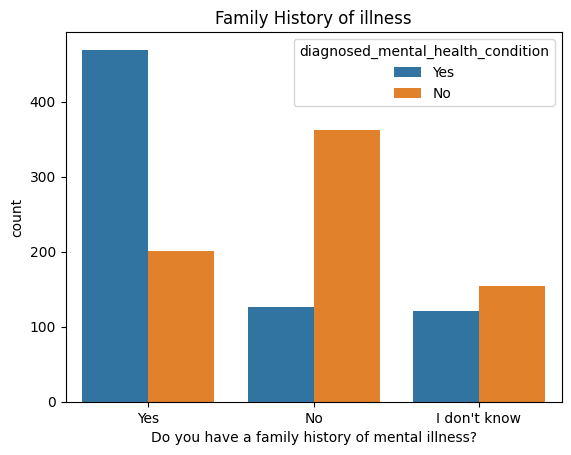

In [283]:
sns.countplot(data=df,x='family_history_mental_illness', hue='diagnosed_mental_health_condition')
plt.xlabel("Do you have a family history of mental illness?")
plt.title('Family History of illness')
plt.savefig('outputs/family_history.png')

**The Influence of Past Mental Illness on Present Well-Being**

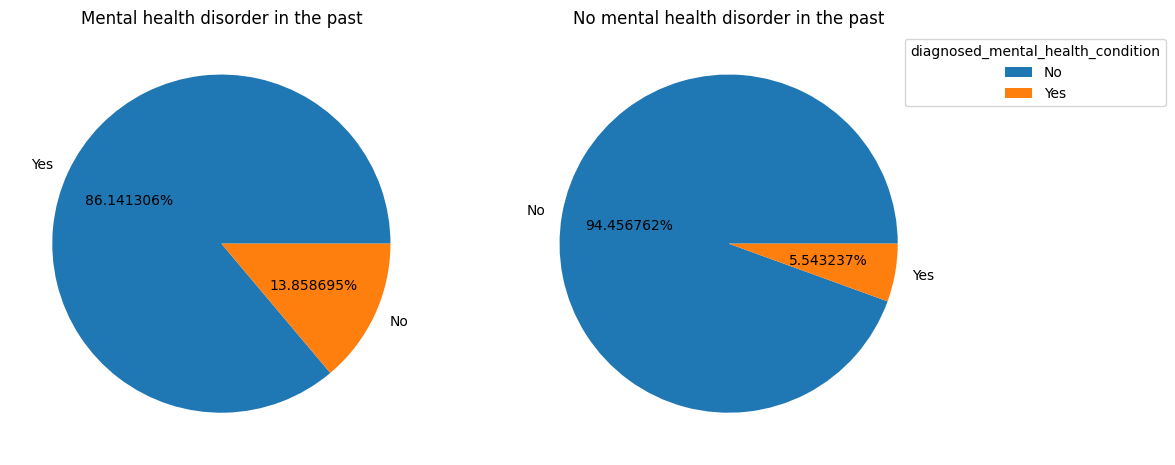

In [284]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Mental health disorder in the past")
plt.pie(df[df.mental_health_disorder_past=='Yes']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df[df.mental_health_disorder_past=='Yes']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("No mental health disorder in the past")
plt.pie(df[df.mental_health_disorder_past=='No']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df[df.mental_health_disorder_past=='No']['diagnosed_mental_health_condition'].value_counts().index)
plt.legend(title="diagnosed_mental_health_condition", bbox_to_anchor=(0.90, 1.0))


plt.savefig('outputs/previous_mental health_illness.png', bbox_inches = 'tight')

**The Impact of Employer Attitudes towards Mental Health on Employee Well-Being**

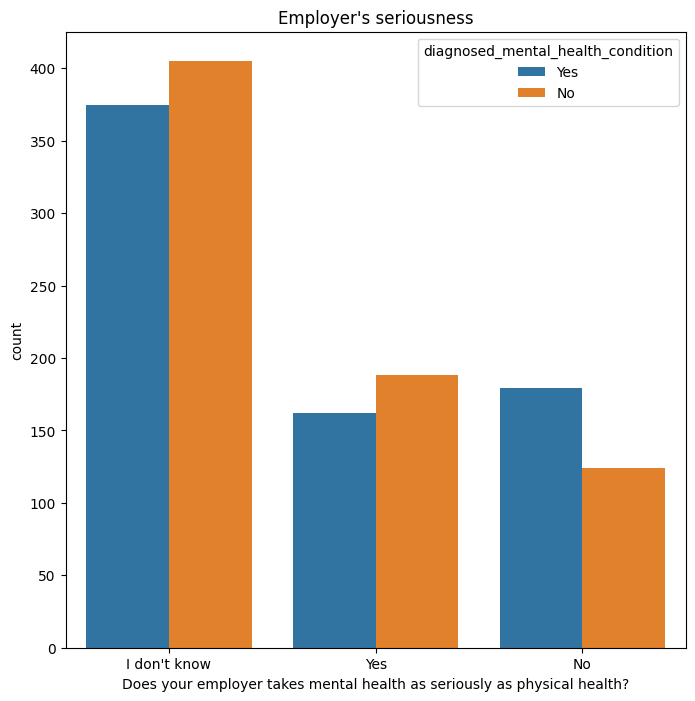

In [285]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='employer_take_mental_health_seriously',hue='diagnosed_mental_health_condition')
plt.xlabel("Does your employer takes mental health as seriously as physical health?")
plt.title("Employer's seriousness")
plt.savefig('outputs/employer_seriousness.png')

**Examining the Relationship between Gender and Mental Health**

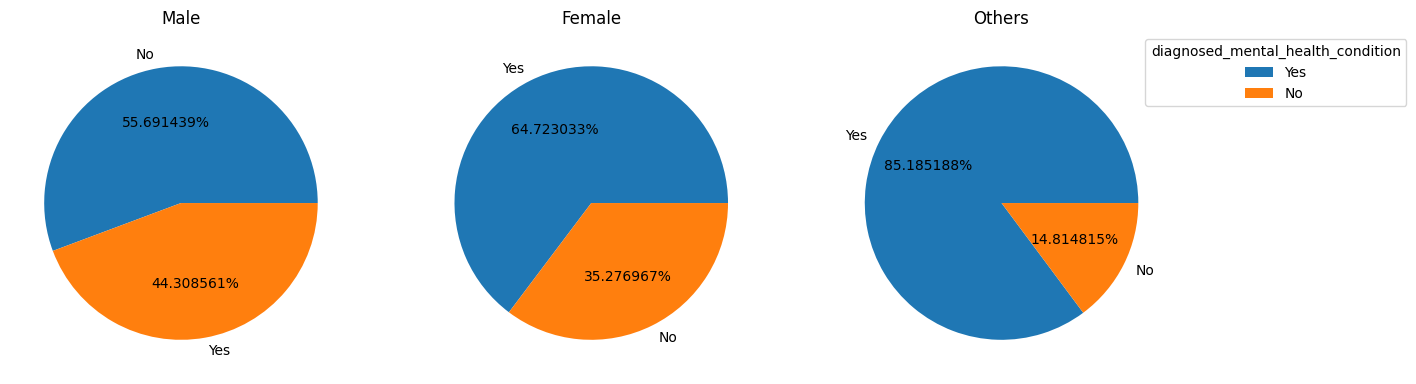

In [286]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title("Male")
plt.pie(df[df.gender=='male']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df[df.gender=='male']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,2)
plt.title("Female")
plt.pie(df[df.gender=='female']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df[df.gender=='female']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,3)
plt.title("Others")
plt.pie(df[df.gender=='other']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df[df.gender=='other']['diagnosed_mental_health_condition'].value_counts().index)
plt.legend(title="diagnosed_mental_health_condition", bbox_to_anchor=(0.90, 1.0))

plt.savefig('outputs/gender.png', bbox_inches = 'tight')

**Selecting features**

In [287]:
X = df.drop(
    [
        "diagnosed_mental_health_condition",
        "treatment_from_professional",
        "while_effective_treatment_mental_health_issue_interferes_work",
        "while_not_effective_treatment_interferes_work ",
    ],
    axis=1,
)

feature_cols = [
    "self_employed",
    "no_of_employees",
    "tech_company",
    "mental_healthcare_coverage",
    "knowledge_about_mental_healthcare_options_workplace",
    "employer_discussed_mental_health ",
    "employer_offer_resources_to_learn_about_mental_health",
    "medical_leave_from_work ",
    "comfortable_discussing_with_coworkers",
    "employer_take_mental_health_seriously",
    "openess_of_family_friends",
    "family_history_mental_illness",
    "mental_health_disorder_past",
    "currently_mental_health_disorder",
    "gender",
    "country",
    "country work ",
    "work_remotely",
    "tech_role",
]

**One-hot encoding**

In [288]:
X = pd.get_dummies(X, columns=feature_cols)
x = X.to_numpy().astype(np.float64)
y = df["diagnosed_mental_health_condition"].replace({"No": 0, "Yes": 1}).to_numpy()

#### Train Test Validation Split

In [289]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1
)

y_train = y_train.reshape((859, 1))
y_val = y_val.reshape((287, 1))
y_test = y_test.reshape((287, 1))

**Convert numpy arrays to tensors**

In [290]:
def convert_to_tensor(data):
    return torch.from_numpy(data).type(torch.float64)

In [291]:
train_inputs_pt = convert_to_tensor(X_train)
train_outputs_pt = convert_to_tensor(y_train)

val_inputs_pt = convert_to_tensor(X_val)
val_outputs_pt = convert_to_tensor(y_val)

test_inputs_pt = convert_to_tensor(X_test)
test_outputs_pt = convert_to_tensor(y_test)

#### Model Architecture

**Linear Block**

In [292]:
class Linear(torch.nn.Module):
    def __init__(self, n_x, n_y):
        super().__init__()
        self.fc = torch.nn.Linear(n_x, n_y, dtype=torch.float64)

    def forward(self, x):
        return self.fc(x)

**ReLU Block**

In [293]:
class ReLU(torch.nn.Module):
    def __init__(self, n_x, n_y):
        super().__init__()
        self.fc = torch.nn.Linear(n_x, n_y, dtype=torch.float64)

    def forward(self, x):
        return torch.nn.functional.relu(self.fc(x))

**Sigmoid Block**

In [294]:
class Sigmoid(torch.nn.Module):
    def __init__(self, n_x, n_y):
        super().__init__()
        self.fc = torch.nn.Linear(n_x, n_y, dtype=torch.float64)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

**DeepNeuralNet Class**

In [295]:
class DeepNeuralNet(torch.nn.Module):
    def __init__(self, n_x, n_h, n_y):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        self.loss = torch.nn.BCELoss()
        self.accuracy = BinaryAccuracy()
        self.create_layers(n_x, n_h, n_y)

    def create_layers(self, n_x, n_h, n_y):
        layer_sizes = [n_x] + n_h + [n_y]
        for i in range(len(layer_sizes) - 1):
            if i == len(layer_sizes) - 2:
                self.layers.append(Sigmoid(layer_sizes[i], layer_sizes[i + 1]))
            else:
                self.layers.append(ReLU(layer_sizes[i], layer_sizes[i + 1]))
                self.layers.append(torch.nn.Dropout(0.5))
                self.layers.append(torch.nn.LeakyReLU(negative_slope=0.1))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def trainer(self, inputs, outputs, val_inputs, val_outputs, N_max = 1000, lr = 0.01, batch_size = 32):
        dataset = torch.utils.data.TensorDataset(inputs, outputs)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size = batch_size, shuffle = True)
        optimizer = torch.optim.SGD(self.parameters(), lr = lr)
        optimizer.zero_grad()
        self.train_loss_history = []
        self.train_accuracy_history = []
        self.validation_loss_history = []
        self.validation_accuracy_history = []
        for iteration_number in range(1, N_max + 1):
            for batch, (X, y) in enumerate(data_loader):
                pred = self(X)
                total_loss = self.loss(pred, y)
                total_loss.backward()
                optimizer.step()
                optimizer.zero_grad()
            prediction = self(inputs)
            acc = self.accuracy(prediction, outputs).item()
            self.train_accuracy_history.append(acc)
            self.train_loss_history.append(total_loss.item())
            with torch.no_grad():
                pred = self(val_inputs)
                val_loss = self.loss(pred, val_outputs)
                val_acc = self.accuracy(pred, val_outputs).item()
            self.validation_loss_history.append(val_loss.item())
            self.validation_accuracy_history.append(val_acc)
            print("Iteration {} - Loss = {} - Accuracy = {} - Validation Loss = {} - Validation Accuracy = {}".format(iteration_number, total_loss, acc, val_loss, val_acc))
        return self.train_loss_history, self.validation_loss_history, self.train_accuracy_history, self.validation_accuracy_history
    
    def tester(self, inputs, outputs):
        self.eval()
        with torch.no_grad():
            pred = self(inputs)
            loss = self.loss(pred, outputs)
            acc = self.accuracy(pred, outputs).item()
        print("Test Loss = {} - Test Accuracy = {}".format(loss, acc))
        return loss, acc

**Training our model**

In [296]:
torch.manual_seed(42)
model = DeepNeuralNet(n_x = 164, n_h = [64, 32, 8], n_y = 1)
train_loss_list, val_loss_list, train_acc, val_acc = model.trainer(train_inputs_pt, train_outputs_pt, val_inputs_pt, val_outputs_pt, N_max = 150, lr = 0.01, batch_size = 32)
torch.save(model.state_dict(), "weights/pytorch_model_{}.pt".format(datetime.datetime.now().strftime("%Y%m%d_%H%M%S")))

Iteration 1 - Loss = 0.7183392216358798 - Accuracy = 0.5157159566879272 - Validation Loss = 0.7135874471623616 - Validation Accuracy = 0.46689894795417786
Iteration 2 - Loss = 0.7157547733084451 - Accuracy = 0.5157159566879272 - Validation Loss = 0.7113730769242924 - Validation Accuracy = 0.46689894795417786
Iteration 3 - Loss = 0.6664792449389361 - Accuracy = 0.5168800950050354 - Validation Loss = 0.710680113309961 - Validation Accuracy = 0.46341463923454285
Iteration 4 - Loss = 0.6620440367434136 - Accuracy = 0.5145518183708191 - Validation Loss = 0.7050575052075407 - Validation Accuracy = 0.45993030071258545
Iteration 5 - Loss = 0.7099441868328994 - Accuracy = 0.5157159566879272 - Validation Loss = 0.7092346955027031 - Validation Accuracy = 0.46341463923454285
Iteration 6 - Loss = 0.6676542368006011 - Accuracy = 0.5157159566879272 - Validation Loss = 0.7078748949322857 - Validation Accuracy = 0.45993030071258545
Iteration 7 - Loss = 0.716725526599405 - Accuracy = 0.5180442333221436 

#### Accuracy and Loss curves

**Training Accuracy vs Validation Accuracy**

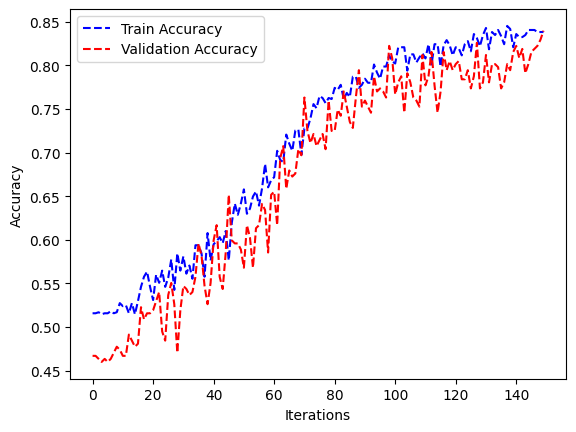

In [297]:
plt.plot(train_acc, "b--", label="Train Accuracy")
plt.plot(val_acc, "r--", label="Validation Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Training Accuracy vs Validation Accuracy**

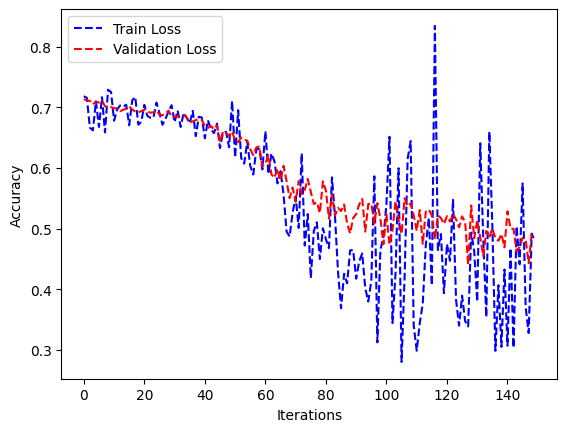

In [298]:
plt.plot(train_loss_list, "b--", label="Train Loss")
plt.plot(val_loss_list, "r--", label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Evaluation

In [299]:
test_loss, test_acc = model.tester(test_inputs_pt, test_outputs_pt)

Test Loss = 0.25494680952059856 - Test Accuracy = 0.9303135871887207


#### Loading the pre-trained model

**Create a new model of the same architecture and load the parameter values**

In [300]:
model2 = DeepNeuralNet(n_x = 164, n_h = [64, 32, 8], n_y = 1)
# Change the path in the following line to load the desired parameter values
model2.load_state_dict(torch.load('weights/pytorch_model_20230409_202319.pt'))
test_loss, test_acc = model2.tester(test_inputs_pt, test_outputs_pt)

Test Loss = 0.25494680952059856 - Test Accuracy = 0.9303135871887207


#### Hyperparameter tuning

**Bayesian optimisation using Auto keras** 

Bayesian search is widely used to hyperparameter tuning and searching. Autokeras is an AutoML library which helps us achieve the same. It constructs deep neural network just by taking in the input dataset, and tunes the parameters using bayesian optimisation. In the follwoing code snippet, we used autokeras to find better parameters for our model.

**Please uncomment the code to run the tuning process**

In [301]:
# # It tries 10 different models.
# clf = ak.StructuredDataClassifier(
#     overwrite=True, max_trials=10
# )

# # Feed the structured data classifier with training data.
# clf.fit(X_train, y_train, validation_data=(X_val, y_val))

#### Performance against some state-of-the-art models

**Random Forest Classifier**

In [302]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/var/folders/gx/kj35h70d08b5l6514d_fcy1w0000gn/T/ipykernel_14059/538115552.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.9163763066202091

**Gradient Boosting Classifier**

In [303]:
clf = clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/ani/Documents/Term 6/DL/Group 6/myenv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9059233449477352

**Ada Boost Classifier**

In [304]:
clf = clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/ani/Documents/Term 6/DL/Group 6/myenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9094076655052264

**Decision Tree Classifier**

In [305]:
clf = clf = DecisionTreeClassifier(max_depth=50)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8606271777003485